In [1]:
# ✅ Instalación de dependencias (si aún no están instaladas)
!pip install -q scikit-learn pandas matplotlib seaborn optuna scikit-optimize deap hyperopt nbformat


In [2]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


In [3]:
from src.utils import cargar_datos_breast_cancer, preprocesar_datos
from src.modelos import entrenar_modelo_base
from src.evaluador import evaluar_modelo
from src.optimizador import optimizar_con_gridsearch, optimizar_con_randomsearch
from src.optimizador_optuna import optimizar_con_optuna
from src.optimizador_skopt import optimizar_con_skopt
from src.optimizador_genetico import optimizar_con_genetico
from src.visualizador import (
    visualizar_matriz_confusion,
    visualizar_curva_roc,
    graficar_metricas_comparativas,
)


/home/mparraf/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
NUM_TRIALS = 200
tuned_params = {
    "n_estimators": [50, 100, 150, 200, 300],
    "max_depth": [5, 10, 15, 20, 30],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}


In [5]:
df = cargar_datos_breast_cancer()
X_train, X_test, y_train, y_test = preprocesar_datos(df)
resultados = []



🧬 Dataset Breast Cancer cargado:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perim


🌲 Entrenando modelo base...

📊 Evaluación del modelo base:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

F1-Score: 0.9488
Precision: 0.9444
Recall: 0.9533
AUC: 0.9913
Tiempo de entrenamiento: 0.11 segundos


<Figure size 600x500 with 0 Axes>

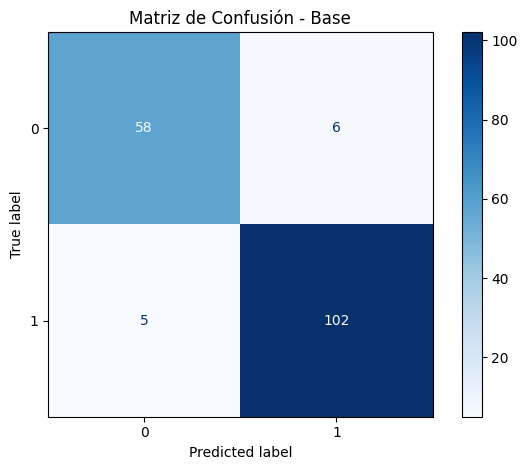

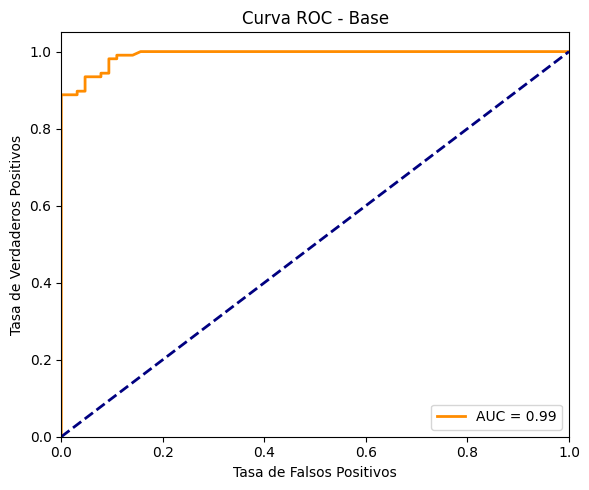

In [6]:
resultado_base = entrenar_modelo_base(X_train, y_train, X_test, y_test)
resultados.append(resultado_base)
visualizar_matriz_confusion(y_test, resultado_base["y_pred"], metodo="Base")
visualizar_curva_roc(y_test, resultado_base["y_prob"], metodo="Base")



🧬 Optimizando con Algoritmo Genético...
📊 Evolución: 200 generaciones con población de 40
📈 Generación 1 | F1 promedio: 0.9595 | F1 máx: 0.9761
📈 Generación 2 | F1 promedio: 0.9706 | F1 máx: 0.9761
📈 Generación 3 | F1 promedio: 0.9676 | F1 máx: 0.9761
📈 Generación 4 | F1 promedio: 0.9598 | F1 máx: 0.9761
📈 Generación 5 | F1 promedio: 0.9696 | F1 máx: 0.9761
📈 Generación 6 | F1 promedio: 0.9644 | F1 máx: 0.9761
📈 Generación 7 | F1 promedio: 0.9701 | F1 máx: 0.9761
📈 Generación 8 | F1 promedio: 0.9643 | F1 máx: 0.9761
📈 Generación 9 | F1 promedio: 0.9492 | F1 máx: 0.9761
📈 Generación 10 | F1 promedio: 0.9741 | F1 máx: 0.9761
📈 Generación 11 | F1 promedio: 0.9593 | F1 máx: 0.9761
📈 Generación 12 | F1 promedio: 0.9693 | F1 máx: 0.9761
📈 Generación 13 | F1 promedio: 0.9495 | F1 máx: 0.9761
📈 Generación 14 | F1 promedio: 0.9700 | F1 máx: 0.9761
📈 Generación 15 | F1 promedio: 0.9649 | F1 máx: 0.9761
📈 Generación 16 | F1 promedio: 0.9642 | F1 máx: 0.9761
📈 Generación 17 | F1 promedio: 0.9553 

<Figure size 600x500 with 0 Axes>

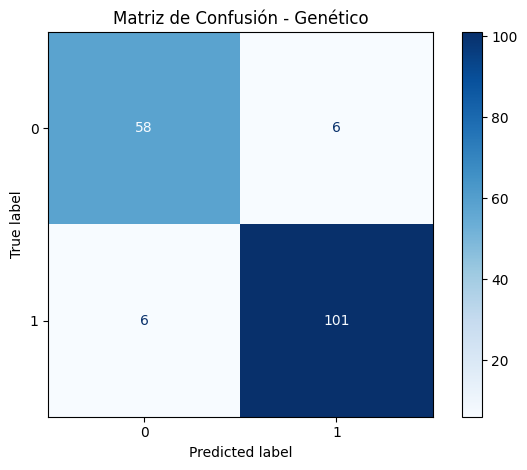

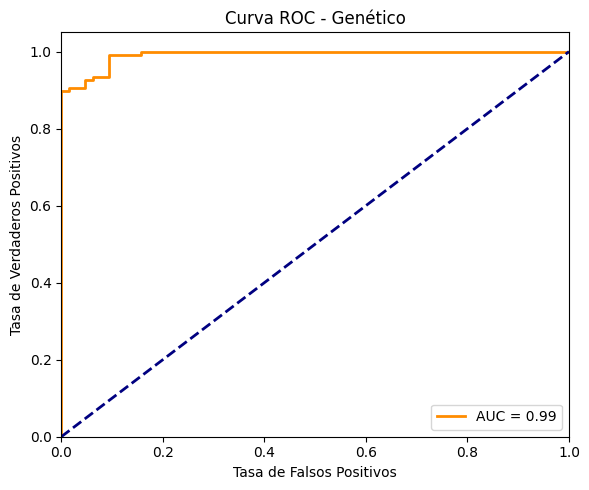

In [7]:
resultado_gen = optimizar_con_genetico(X_train, y_train, X_test, y_test, n_generaciones=NUM_TRIALS, tuned_params=tuned_params)
resultados.append(resultado_gen)
visualizar_matriz_confusion(y_test, resultado_gen["y_pred"], metodo="Genético")
visualizar_curva_roc(y_test, resultado_gen["y_prob"], metodo="Genético")



🔧 Grid Search en progreso...
✅ Mejores parámetros Grid Search: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

📊 Evaluación GridSearch:
F1-Score: 0.9439
Precision: 0.9439
Recall: 0.9439
AUC: 0.9917
⏱️ Tiempo de optimización: 44.27 segundos


<Figure size 600x500 with 0 Axes>

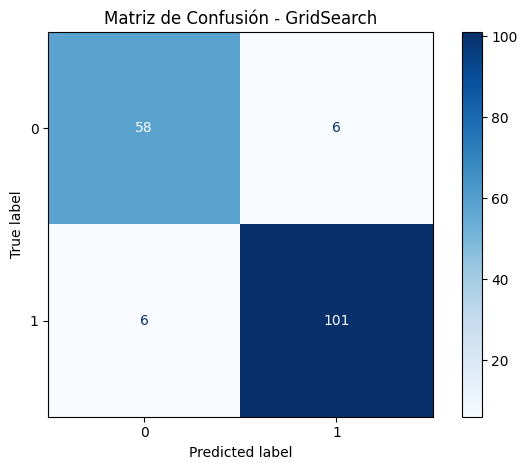

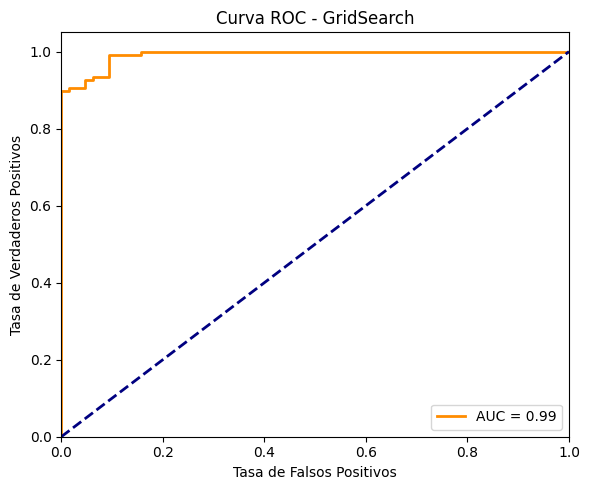

In [8]:
resultado_grid = optimizar_con_gridsearch(X_train, y_train, X_test, y_test, tuned_params)
resultados.append(resultado_grid)
visualizar_matriz_confusion(y_test, resultado_grid["y_pred"], metodo="GridSearch")
visualizar_curva_roc(y_test, resultado_grid["y_prob"], metodo="GridSearch")



🍀 Random Search en progreso...
✅ Mejores parámetros Random Search: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

📊 Evaluación RandomSearch:
F1-Score: 0.9439
Precision: 0.9439
Recall: 0.9439
AUC: 0.9917
⏱️ Tiempo de optimización: 15.54 segundos


<Figure size 600x500 with 0 Axes>

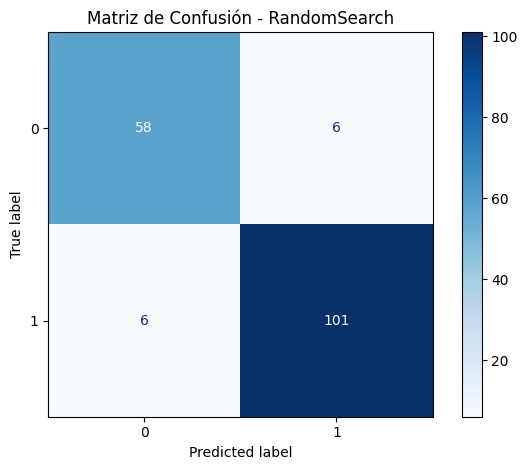

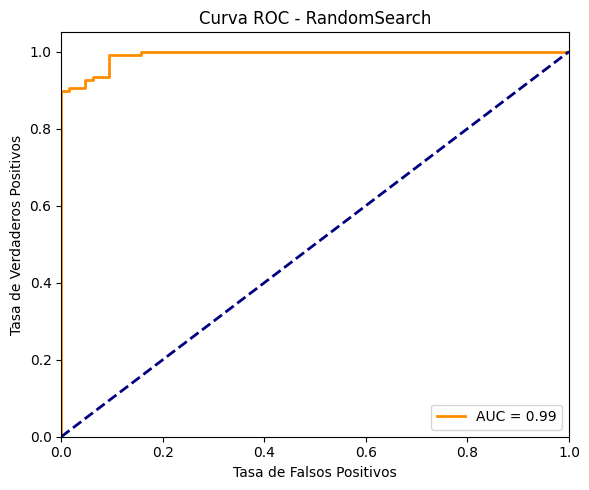

In [9]:
resultado_random = optimizar_con_randomsearch(X_train, y_train, X_test, y_test, NUM_TRIALS, tuned_params)
resultados.append(resultado_random)
visualizar_matriz_confusion(y_test, resultado_random["y_pred"], metodo="RandomSearch")
visualizar_curva_roc(y_test, resultado_random["y_prob"], metodo="RandomSearch")


[I 2025-07-09 19:27:10,732] A new study created in memory with name: no-name-207f8a77-223e-466c-a0f5-3f8fa9338dec
[I 2025-07-09 19:27:10,851] Trial 0 finished with value: 0.9488372093023255 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 0 with value: 0.9488372093023255.



🔮 Optimizando con Optuna...


[I 2025-07-09 19:27:11,185] Trial 1 finished with value: 0.9585253456221198 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 1 with value: 0.9585253456221198.
[I 2025-07-09 19:27:11,299] Trial 2 finished with value: 0.9439252336448598 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 10}. Best is trial 1 with value: 0.9585253456221198.
[I 2025-07-09 19:27:11,415] Trial 3 finished with value: 0.9439252336448598 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 1 with value: 0.9585253456221198.
[I 2025-07-09 19:27:11,591] Trial 4 finished with value: 0.9537037037037037 and parameters: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 1 with value: 0.9585253456221198.
[I 2025-07-09 19:27:11,817] Trial 5 finished with value: 0.9439252336448598 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 10}. Best is trial 1 with value

✅ Mejores parámetros Optuna: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 2}

📊 Evaluación Optuna:
F1-Score: 0.9585
Precision: 0.9455
Recall: 0.9720
AUC: 0.9915
⏱️ Tiempo de optimización: 46.26 segundos


<Figure size 600x500 with 0 Axes>

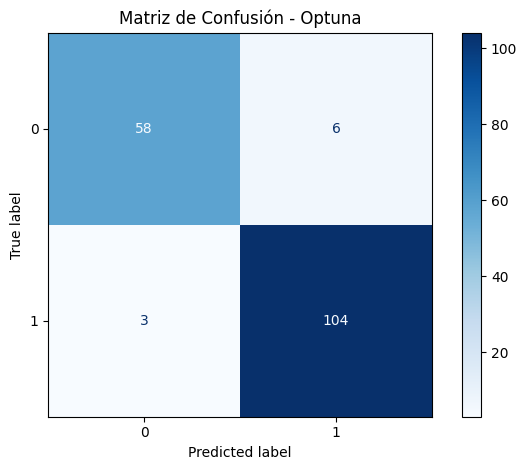

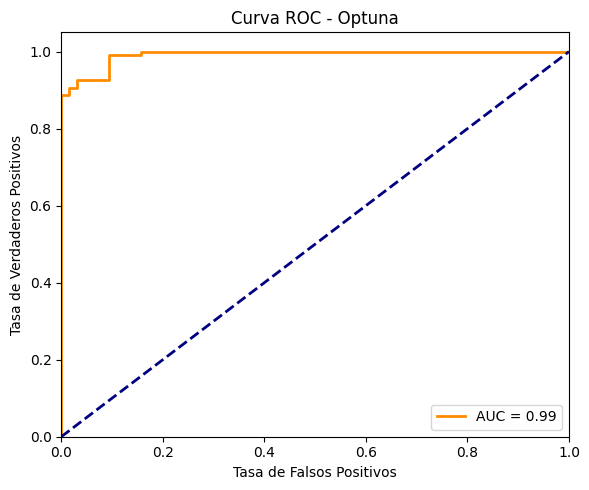

In [10]:
resultado_optuna = optimizar_con_optuna(X_train, y_train, X_test, y_test, NUM_TRIALS, tuned_params)
resultados.append(resultado_optuna)
visualizar_matriz_confusion(y_test, resultado_optuna["y_pred"], metodo="Optuna")
visualizar_curva_roc(y_test, resultado_optuna["y_prob"], metodo="Optuna")



🧠 Optimizando con BayesSearchCV (skopt)...
✅ Mejores parámetros skopt: OrderedDict([('bootstrap', True), ('max_depth', 30), ('min_samples_leaf', 1), ('min_samples_split', 5), ('n_estimators', 200)])

📊 Evaluación Skopt:
F1-Score: 0.9439
Precision: 0.9439
Recall: 0.9439
AUC: 0.9917
⏱️ Tiempo de optimización: 1956.11 segundos


<Figure size 600x500 with 0 Axes>

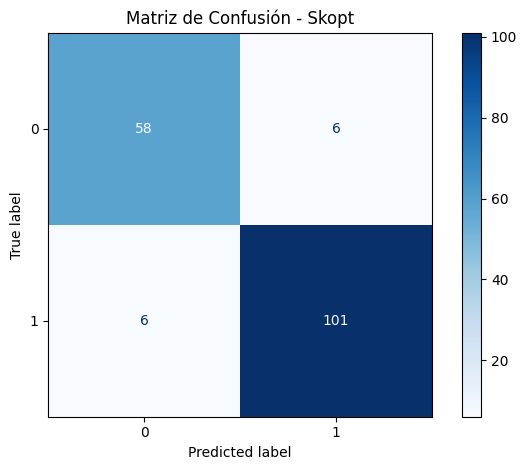

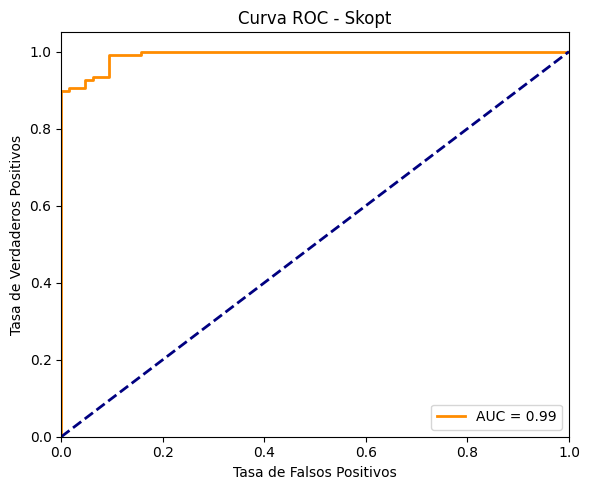

In [11]:
resultado_skopt = optimizar_con_skopt(X_train, y_train, X_test, y_test, NUM_TRIALS, tuned_params)
resultados.append(resultado_skopt)
visualizar_matriz_confusion(y_test, resultado_skopt["y_pred"], metodo="Skopt")
visualizar_curva_roc(y_test, resultado_skopt["y_prob"], metodo="Skopt")


/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase4MarcoParra/src/visualizador.py:81: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase4MarcoParra/src/visualizador.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("outputs/comparacion_metricas_modelos.png")
/home/mparraf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


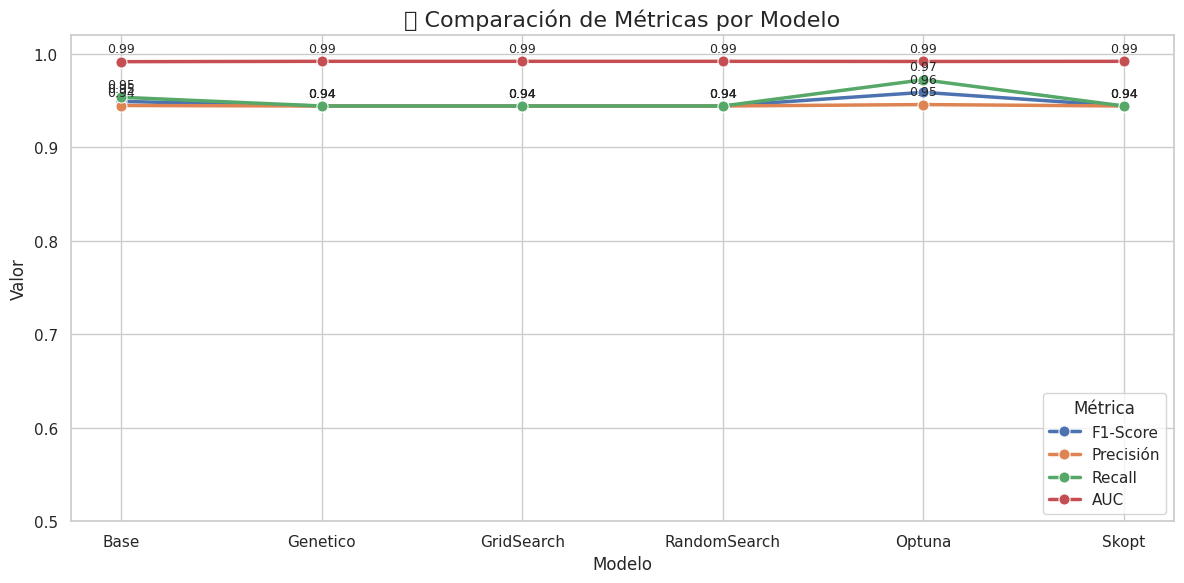


✅ Pipeline de entrenamiento y optimización completado.


In [12]:
graficar_metricas_comparativas(resultados)
print("\n✅ Pipeline de entrenamiento y optimización completado.")
